# Introduction

The access to safe drinking water is an important aspect of health, sanitation and hygiene. According to the World Health Organisation, some 2.2 billion people around the world do not have access to safe drinking water<sup>1</sup>. The investment in water supply and sanitation is important for public heath in preventing the spread of diseases and can yield a net economic benefit. Therefore, the development of technologies that can effectively identify safe drinking water will facilitate the deployment of solutions that will alleviate water shortages. This project outlined here will use Machine Learning Algorithms to predict the water potability of water bodies based on labelled data from surveryed water quality metrics.   

<sup>1</sup> <sub>https://www.who.int/news/item/18-06-2019-1-in-3-people-globally-do-not-have-access-to-safe-drinking-water-unicef-who</sub>

# Dataset

The [`water_potability.csv`] dataset contains 10 different water quality metrics for 3276 different water bodies expressed as floating point values. More details on the dataset can be found on [Kaggle](https://www.kaggle.com/adityakadiwal/water-potability). 

#### 1. pH value:

PH is an important parameter in evaluating the acid–base balance of water. It is also the indicator of acidic or alkaline condition of water status.  WHO has recommended maximum permissible limit of pH from 6.5 to 8.5. The current investigation ranges were 6.52–6.83 which are in the range of WHO standards.

#### 2. Hardness:

Hardness is mainly caused by calcium and magnesium salts. These salts are dissolved from geologic deposits through which water travels. The length of time water is in contact with hardness producing material helps determine how much hardness there is in raw water. Hardness was originally defined as the capacity of water to precipitate soap caused by Calcium and Magnesium.

#### 3. Solids (Total dissolved solids - TDS):

Water has the ability to dissolve a wide range of inorganic and some organic minerals or salts such as potassium, calcium, sodium, bicarbonates, chlorides, magnesium, sulfates etc. These minerals produced un-wanted taste and diluted color in appearance of water. This is the important parameter for the use of water. The water with high TDS value indicates that water is highly mineralized. Desirable limit for TDS is 500 mg/l and maximum limit is 1000 mg/l which prescribed for drinking purpose.

#### 4. Chloramines:

Chlorine and chloramine are the major disinfectants used in public water systems. Chloramines are most commonly formed when ammonia is added to chlorine to treat drinking water. Chlorine levels up to 4 milligrams per liter (mg/L or 4 parts per million (ppm)) are considered safe in drinking water.

#### 5. Sulfate:

Sulfates are naturally occurring substances that are found in minerals, soil, and rocks. They are present in ambient air, groundwater, plants, and food. The principal commercial use of sulfate is in the chemical industry. Sulfate concentration in seawater is about 2,700 milligrams per liter (mg/L). It ranges from 3 to 30 mg/L in most freshwater supplies, although much higher concentrations (1000 mg/L) are found in some geographic locations.

#### 6. Conductivity:

Pure water is not a good conductor of electric current rather’s a good insulator. Increase in ions concentration enhances the electrical conductivity of water. Generally, the amount of dissolved solids in water determines the electrical conductivity. Electrical conductivity (EC) actually measures the ionic process of a solution that enables it to transmit current. According to WHO standards, EC value should not exceeded 400 μS/cm.

#### 7. Organic_carbon:

Total Organic Carbon (TOC) in source waters comes from decaying natural organic matter (NOM) as well as synthetic sources. TOC is a measure of the total amount of carbon in organic compounds in pure water. According to US EPA < 2 mg/L as TOC in treated / drinking water, and < 4 mg/Lit in source water which is use for treatment.

#### 8. Trihalomethanes:

THMs are chemicals which may be found in water treated with chlorine. The concentration of THMs in drinking water varies according to the level of organic material in the water, the amount of chlorine required to treat the water, and the temperature of the water that is being treated. THM levels up to 80 ppm is considered safe in drinking water.

#### 9. Turbidity:

The turbidity of water depends on the quantity of solid matter present in the suspended state. It is a measure of light emitting properties of water and the test is used to indicate the quality of waste discharge with respect to colloidal matter. The mean turbidity value obtained for Wondo Genet Campus (0.98 NTU) is lower than the WHO recommended value of 5.00 NTU.

#### 10. Potability:

Indicates if water is safe for human consumption where 1 means Potable and 0 means Not potable.

# Task

The task is to create a machine learning model to determine if the sampled water body is fit for human consumption.

# Strategy

1. Exploratory Data Analysis (EDA)


2. Data Preparation for Machine Learning.
    * Data stratification into training and test set.
    * Upsampling of training set.
    * Building transformation pipeline - dealing with missing values using multiple mean imputation and standard scaling of dataset. 


3. Model Building
    * Logistic Regression  
    * Decision Tree Classifier
    * Random Forest Classifier


4. Random Forest hyper parameter tuning
    * Randomised Search Cross Validation
    * Grid Search Cross Validation 


5. Model comparison
    * ROC Curves and accuracy
    

# Data Exploration

Most columns for each data type is expressed as `float64` value with exceptions of "Potability" which is expressed as `int64`. As evident from the count values, pH, Sulfates and Trihalomethanes contain `NAN` values which were imputed with the mean of each column's values. 

In [20]:
# Read in data
import pandas as pd

water_quality = pd.read_csv('~/kaggle/input/water_potability.csv')
water_quality.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2785 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          2495 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3114 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB


In [21]:
water_quality["Potability"] = water_quality["Potability"].astype("category")
type(water_quality.iloc[:,1].values[1])

numpy.float64

In [22]:
water_quality.describe()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity
count,2785.000000,3276.000000,3276.000000,3276.000000,2495.000000,3276.000000,3276.000000,3114.000000,3276.000000
mean,7.080795,196.369496,22014.092526,7.122277,333.775777,426.205111,14.284970,66.396293,3.966786
std,1.594320,32.879761,8768.570828,1.583085,41.416840,80.824064,3.308162,16.175008,0.780382
min,0.000000,47.432000,320.942611,0.352000,129.000000,181.483754,2.200000,0.738000,1.450000
25%,6.093092,176.850538,15666.690297,6.127421,307.699498,365.734414,12.065801,55.844536,3.439711
50%,7.036752,196.967627,20927.833607,7.130299,333.073546,421.884968,14.218338,66.622485,3.955028
75%,8.062066,216.667456,27332.762127,8.114887,359.950170,481.792304,16.557652,77.337473,4.500320
max,14.000000,323.124000,61227.196008,13.127000,481.030642,753.342620,28.300000,124.000000,6.739000


In [23]:
water_quality.isna().sum().values

array([491,   0,   0,   0, 781,   0,   0, 162,   0,   0])

Counts are different indicating there are 491, 781, 162 NA's in `ph`, `Sulfate` and `Trihalomethanes` respectively.

In [24]:
water_quality.loc[water_quality["Potability"] == 1].describe()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity
count,1101.000000,1278.000000,1278.000000,1278.000000,985.000000,1278.000000,1278.000000,1223.000000,1278.000000
mean,7.073783,195.800744,22383.991018,7.169338,332.566990,425.383800,14.160893,66.539684,3.968328
std,1.448048,35.547041,9101.010208,1.702988,47.692818,82.048446,3.263907,16.327419,0.780842
min,0.227499,47.432000,728.750830,0.352000,129.000000,201.619737,2.200000,8.175876,1.492207
25%,6.179312,174.330531,15668.985035,6.094134,300.763772,360.939023,12.033897,56.014249,3.430909
50%,7.036752,196.632907,21199.386614,7.215163,331.838167,420.712729,14.162809,66.678214,3.958576
75%,7.933068,218.003420,27973.236446,8.199261,365.941346,484.155911,16.356245,77.380975,4.509569
max,13.175402,323.124000,56488.672413,13.127000,481.030642,695.369528,23.604298,124.000000,6.494249


In [25]:
water_quality.loc[water_quality["Potability"] == 0].describe()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity
count,1684.000000,1998.000000,1998.000000,1998.000000,1510.000000,1998.000000,1998.000000,1891.000000,1998.000000
mean,7.085378,196.733292,21777.490788,7.092175,334.564290,426.730454,14.364335,66.303555,3.965800
std,1.683499,31.057540,8543.068788,1.501045,36.745549,80.047317,3.334554,16.079320,0.780282
min,0.000000,98.452931,320.942611,1.683993,203.444521,181.483754,4.371899,0.738000,1.450000
25%,6.037723,177.823265,15663.057382,6.155640,311.264006,368.498530,12.101057,55.706530,3.444062
50%,7.035456,197.123423,20809.618280,7.090334,333.389426,422.229331,14.293508,66.542198,3.948076
75%,8.155510,216.120687,27006.249009,8.066462,356.853897,480.677198,16.649485,77.277704,4.496106
max,14.000000,304.235912,61227.196008,12.653362,460.107069,753.342620,28.300000,120.030077,6.739000


## Data distribution

Text(0.5, 0.98, 'Water Quality Distribution plots')

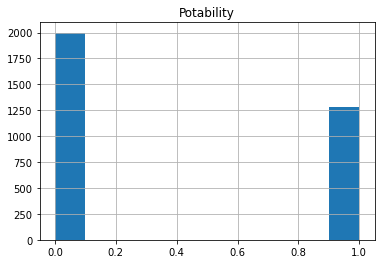

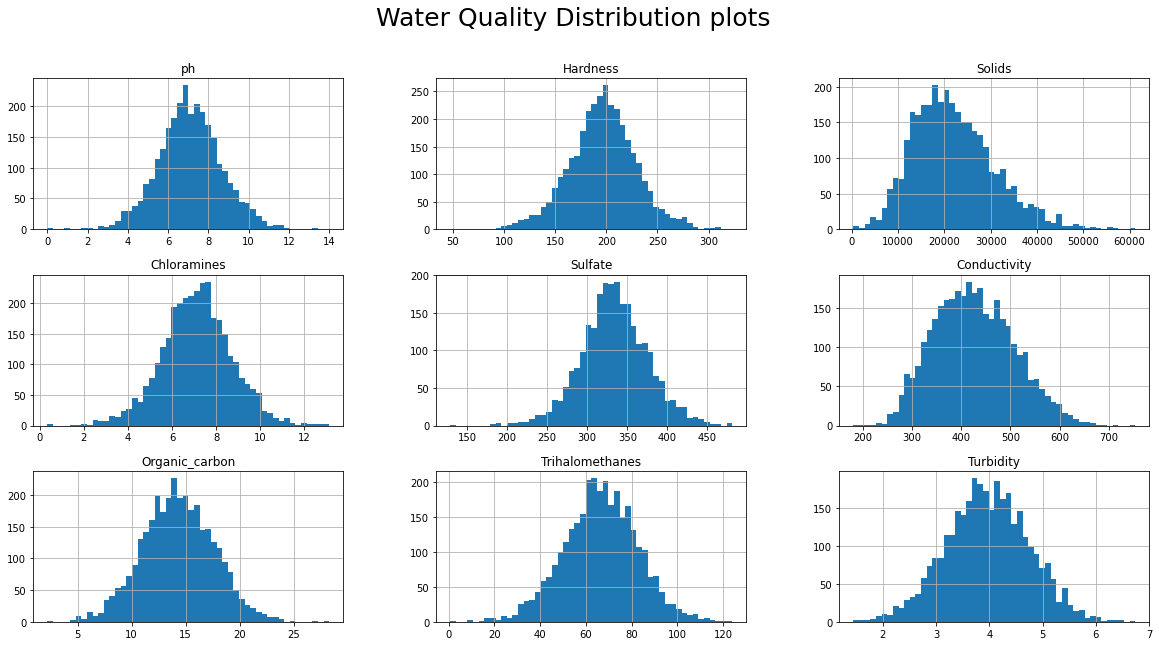

In [26]:
import matplotlib.pyplot as plt
potability = water_quality["Potability"].hist()
potability.set_title("Potability")
water_quality.hist(bins = 50, figsize = (20, 10))
plt.show
plt.suptitle("Water Quality Distribution plots", fontsize = 25)

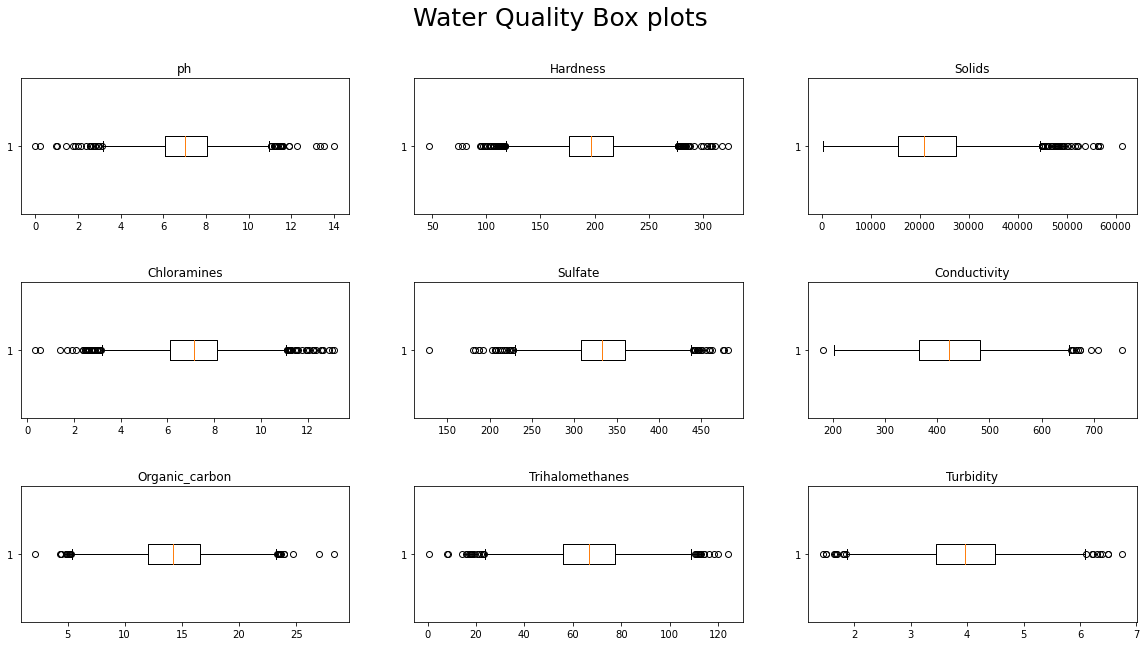

In [27]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(nrows = 3, ncols = 3, figsize = (20, 10))
fig.suptitle("Water Quality Box plots", fontsize = 25)
fig.subplots_adjust(hspace=0.5)
counter = 0

for row_idx in range(3):
    for col_idx in range(3):
        axs[row_idx, col_idx].boxplot(water_quality.iloc[:,counter].dropna(), vert = False)
        axs[row_idx, col_idx].set_title(water_quality.columns[counter])
        counter += 1


Data in the solids are right skewed while sulfate are slightly left skewed. Overall, the data is still relatively normally distributed. The histogram of potability indicated an unbalanced dataset which may bias the model during training.

# Data Prep for ML
## Splitting datasets into train and test set

* Stratify the dataset to split into training and testing set.
* Training dataset is up-sampled to address the imbalance in the potability dataset. This should address potential bias in the model as a result of imbalanced training dataset.

Text(0, 0.5, 'Count')

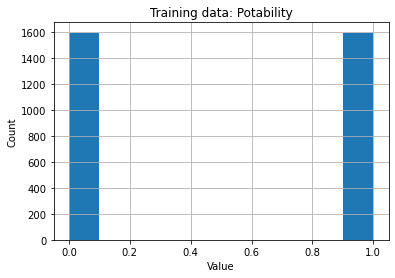

In [28]:
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.utils import resample
from sklearn.utils import shuffle

# Data stratification
split = StratifiedShuffleSplit(n_splits = 1, test_size = 0.2, random_state = 42)
for train_index, test_index in split.split(water_quality, water_quality["Potability"]):
    strat_train_set = water_quality.loc[train_index]
    strat_test_set = water_quality.loc[test_index]
    
# Upsampling of data
portable = strat_train_set.loc[strat_train_set["Potability"] == 1]
not_portable  = strat_train_set.loc[strat_train_set["Potability"] == 0]
portable = resample(portable, replace = True, n_samples = len(not_portable), random_state = 42)
strat_train_set = pd.concat([portable, not_portable])
strat_train_set = shuffle(strat_train_set, random_state = 42)

strat_train_set["Potability"].hist()
plt.title("Training data: Potability")
plt.xlabel("Value")
plt.ylabel("Count")

In [29]:
strat_test_set["Potability"].value_counts()/len(strat_test_set)

0    0.609756
1    0.390244
Name: Potability, dtype: float64

In [30]:
water_quality["Potability"].value_counts()/len(water_quality)

0    0.60989
1    0.39011
Name: Potability, dtype: float64

Training was initially stratified then upsampled to fix unbalanced Potability data entries. Test data set was not upsampled to preserve data quality and was stratified as according to original data set. A 60/40 percent split for non-potable vs potable entries exists in the data. 

## Transformation pipeline

1. Multiple missing value imputation.
2. Standard scaling of data.

Transformation pipeline is created to standardise data transformations for all data being used to train the models. Specifically, the data will be fitted according to training data set values. Fitted information will be used to transform testing data set in order to compared performace between models.

In [31]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

# Create pipeline
pipeline = Pipeline([
    ("iterative_imputer", SimpleImputer(strategy = "mean")),
    ("std_scaler", StandardScaler())
])

# predictors
training_pred = pipeline.fit_transform(strat_train_set.drop("Potability", axis = 1))

# explanatory
training_labels = strat_train_set["Potability"].values


# Fit and transform data through pipeline 
training_pred = pd.DataFrame(training_pred)
training_pred


,0,1,2,3,4,5,6,7,8
0,2.220299,-0.984496,-0.030789,0.472445,0.577340,1.629157,-0.056008,-6.412752e-01,1.381348
1,0.048951,0.211347,-0.191451,0.339582,-1.266343,-1.408497,0.070100,5.241846e-01,-0.048619
2,0.094345,0.509742,0.151774,-0.730785,-0.165012,-1.286848,-0.081029,-3.611165e-01,-0.185221
3,0.633108,0.512620,-0.751096,0.332096,-0.438382,-0.657116,-1.474803,-6.882141e-01,0.199696
4,-0.058699,-0.780200,-0.217687,-1.165042,1.165645,1.030201,0.364066,-1.017012e-01,1.173199
...,...,...,...,...,...,...,...,...,...
3191,-0.320481,-0.067530,-0.198479,-0.666710,-0.709475,-0.208638,0.481559,-5.484613e-01,0.694035
3192,-0.087586,-0.622614,1.540608,-0.995404,-1.187169,-0.351140,-1.214071,1.320522e-02,1.627534
3193,0.000000,-0.086589,-0.862617,-0.906050,-0.316702,0.024752,-0.477514,1.698647e+00,0.556008
3194,0.000000,0.278601,0.560674,-1.886586,-0.969403,1.067130,-1.585196,-1.163667e+00,0.113725


# Model Building

## Logistic Regression

In [32]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
import numpy as np
from sklearn import metrics

def display_scores(scores):
    print("Scores:", scores)
    print("Means:", scores.mean())
    print("Standard Deviation:", scores.std())

logistic_model = LogisticRegression(solver = "liblinear", random_state = 42)
logistic_model.fit(training_pred, training_labels)
log_scores = cross_val_score(logistic_model, 
                             training_pred, 
                             training_labels,
                             scoring = "accuracy", cv = 10)
display_scores(log_scores)

Scores: [0.55       0.496875   0.50625    0.496875   0.528125   0.496875
 0.48902821 0.53291536 0.46394984 0.53918495]
Means: 0.5100078369905956
Standard Deviation: 0.02529166343250258


# Decision Trees

In [33]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(random_state = 42)
dt.fit(training_pred, training_labels)
dt_scores = cross_val_score(dt, 
                           training_pred,
                           training_labels,
                           scoring = "accuracy", cv = 10)
display_scores(dt_scores)

Scores: [0.775      0.778125   0.80625    0.825      0.784375   0.75625
 0.79623824 0.79623824 0.76489028 0.7460815 ]
Means: 0.7828448275862069
Standard Deviation: 0.02269577026050326


# Randomforest classifier

In [34]:
from sklearn.ensemble import RandomForestClassifier

rf_untuned = RandomForestClassifier(random_state = 42)
rf_untuned.fit(training_pred, training_labels)
rf_scores = cross_val_score(rf_untuned, training_pred, training_labels,
                               scoring = "accuracy")
display_scores(rf_scores)

Scores: [0.840625   0.85446009 0.84037559 0.83881064 0.85446009]
Means: 0.8457462832550862
Standard Deviation: 0.007141933051891663


In [35]:
model_scores = {"mean_cv_accuracy":[np.mean(log_scores),
                               np.mean(dt_scores),
                               np.mean(rf_scores)]}
model_scores = pd.DataFrame(data = model_scores, index = ["log", "dt", "rf"])
model_scores

,mean_cv_accuracy
log,0.510008
dt,0.782845
rf,0.845746


## Random forest hyperparameter tuning by Randomised Search

The following lines of code were adapted from https://towardsdatascience.com/hyperparameter-tuning-the-random-forest-in-python-using-scikit-learn-28d2aa77dd74

In [145]:
# The following lines of code were adapted from 

from sklearn.model_selection import RandomizedSearchCV

# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)

# Create the random grid
random_grid = {'n_estimators': [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)],
               'criterion': ['gini', 'entropy'],
               'max_features': ['auto', 'sqrt'],
               'max_depth': max_depth,
               'min_samples_split': [2, 5, 10],
               'min_samples_leaf': [1, 2, 4],
               'bootstrap': [True, False],
               'random_state' : [42]}
rf = RandomForestClassifier(random_state = 42)
rf_random = RandomizedSearchCV(estimator = rf, 
                               param_distributions = random_grid, 
                               n_iter = 100, cv = 3, 
                               verbose=2, n_jobs = -1, random_state = 42)
rf_random.fit(training_pred, training_labels)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(random_state=42),
                   n_iter=100, n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'criterion': ['gini', 'entropy'],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000],
                                        'random_state': [42]},
                

In [146]:
rf_random.best_params_

{'random_state': 42,
 'n_estimators': 1800,
 'min_samples_split': 5,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': 70,
 'criterion': 'gini',
 'bootstrap': False}

## Random forest hyperparameter tuning by Grid Search

Randomised search resulted in parameters where:

* 'n_estimators': 1800,
* 'min_samples_split': 5,
* 'min_samples_leaf': 1,
* 'max_features': 'sqrt',
* 'max_depth': 70,
* 'criterion': 'gini',
* 'bootstrap': False
 
Best parameters from randomised search will feed a more intensive GridSearch for the best performing model ranging at the values defined in the randomised searched parameters.

#### First Grid Search

In [149]:
# Gridsearch for best parameter.
# import joblib

from sklearn.model_selection import GridSearchCV

param_1 = {
    "n_estimators" : [int(x) for x in np.linspace(start = 1600, stop = 2000, num = 5)],
    "min_samples_split" : [5],
    "min_samples_leaf" : [1],
    "max_features" : ['sqrt'],
    "max_depth" : [int(x) for x in np.linspace(start = 50, stop = 100, num = 5)],
    "criterion" : ['gini'],
    "bootstrap" : [False],
    "random_state" : [42]
}

param_grid = [param_1]
rf = RandomForestClassifier(random_state = 42)
rf_grid_search = GridSearchCV(rf, param_grid, cv = 5, scoring = "accuracy",
                             return_train_score = True, n_jobs = -1, verbose = 2)
rf_grid_search.fit(training_pred, training_labels)

rf_grid_search.best_estimator_.get_params()

# Export best estimator into pkl file: Uncomment next line to export model into a file
# joblib.dump(rf_grid_search.best_estimator_, "random_forest_best_estimator.pkl")

Fitting 5 folds for each of 25 candidates, totalling 125 fits


{'bootstrap': False,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': 50,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 5,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 1600,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}

#### Second Grid Search

A second grid search is required as `n_estimators` for the best estimator lies on the bottom range of the defined grid search value.

In [ ]:
# Gridsearch for best parameter.
import joblib
from sklearn.model_selection import GridSearchCV
param_2 = {
    "n_estimators" : [int(x) for x in np.linspace(start = 1300, stop = 1600, num = 5)],
    "min_samples_split" : [5],
    "min_samples_leaf" : [1],
    "max_features" : ['sqrt'],
    "max_depth" : [int(x) for x in np.linspace(start = 30, stop = 55, num = 5)],
    "criterion" : ['gini'],
    "bootstrap" : [False],
    "random_state" : [42]
}

param_grid = [param_2]
rf = RandomForestClassifier(random_state = 42)
rf_grid_search = GridSearchCV(rf, param_grid, cv = 5, scoring = "accuracy",
                             return_train_score = True, n_jobs = -1, verbose = 2)
rf_grid_search.fit(training_pred, training_labels)

rf_grid_search.best_estimator_.get_params()

# Export best estimator into pkl file
joblib.dump(rf_grid_search.best_estimator_, "random_forest_best_estimator.pkl")

Fitting 5 folds for each of 25 candidates, totalling 125 fits


#### Cross validation of tuned random forest model

In [36]:
rf_best = joblib.load("random_forest_best_estimator.pkl")
#rf_best = rf_grid_search.best_estimator_
rf_best.fit(training_pred, training_labels)
forest_scores = cross_val_score(rf_best, training_pred, 
                                training_labels,
                               scoring = "accuracy")
display_scores(forest_scores)

Scores: [0.8515625  0.87010955 0.86384977 0.8513302  0.85289515]
Means: 0.8579494327073552
Standard Deviation: 0.007652910245538512


In [37]:
pd.DataFrame([{'Untuned_Rf':rf_scores.mean(),
               'Tuned_Rf':forest_scores.mean()}], 
             index = ["Average Scores"])

,Untuned_Rf,Tuned_Rf
Average Scores,0.845746,0.857949


Randomforest hyperparameter tuning resulted in a small increase in accuracy by 1.2% through K-fold cross validation of training dataset. A final reported accuracy of 85.7% is evident for the best performing tuned Randomforest model. 

# Model Validation (ROC & Confusion Matrix) - Test Set

Model validation is validated on stratified test data that has been transformed on the fitted values of training data. This results in the multiple imputation of missing values in the test set with the means of each category from the training data. It will also result in the scaling of test set to the fitted values evaluated in the training data. Model performance is evaluated by plotting the Receiver Operating Characteristic (ROC) curves and confusion matrix of the model predictions.


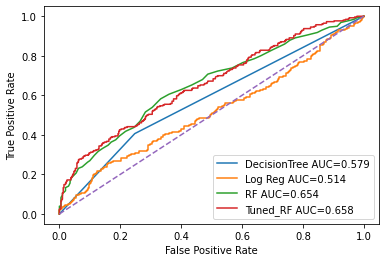

In [38]:
# Transform test data on fitted values of training data.
test_features = pipeline.transform(strat_test_set.drop("Potability", axis = 1))
test_labels = strat_test_set.loc[:,"Potability"]

model_list = {"DecisionTree":dt,
              "Log Reg":logistic_model,
             "RF": rf_untuned,
             "Tuned_RF": rf_best}

# Function to create ROC plot of multiple models.
def plot_multi_roc(model, features, labels):
    
    from sklearn.metrics import roc_curve, roc_auc_score
    from matplotlib import pyplot as plt
    
    if type(model) != dict:
        raise NameError("Not Valid Dict")
        
    for key in model_list:
        model = model_list[key]
        predictions = model.predict_proba(features)[:,1]
        auc = roc_auc_score(labels, predictions)
        fig_label = "%s AUC=%.3f" % (key, auc)
        fpr, tpr, threshld = roc_curve(labels, predictions)
        plt.plot(fpr, tpr, label = fig_label)
    
    plt.plot([0,1],[0,1], linestyle = '--')
    plt.legend()
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    
plot_multi_roc(model_list, test_features, test_labels)

True Negative: 375
False Positives: 25
False Negative: 186
True Positives: 70
Sensitivity: 0.2734
Specificity: 0.9375
Precision: 0.7368
F1 Score: 0.3989 


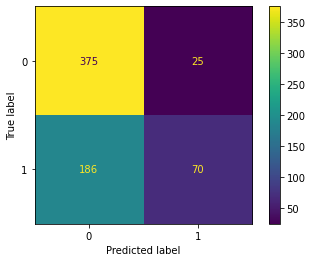

In [44]:
def draw_confusion_matrix(model, features, labels, threshold = 0.5):
    
    from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, f1_score, precision_score, recall_score
    
    predicted_prob = model.predict_proba(features)
    predicted_prob = pd.DataFrame(predicted_prob)
    predicted_prob["model_classification"] = np.where(predicted_prob.loc[:,1] > threshold, 1, 0)
    cm = confusion_matrix(labels, predicted_prob["model_classification"])
    disp = ConfusionMatrixDisplay(confusion_matrix = cm,
                             display_labels = model.classes_)
    
    tn, fp, fn, tp = confusion_matrix(labels, 
                                  predicted_prob["model_classification"]).ravel()
    disp.plot()
    print("True Negative: %s\nFalse Positives: %s\nFalse Negative: %s\nTrue Positives: %s" %(tn, fp, fn, tp))
    print("Sensitivity: %.4f\nSpecificity: %.4f\nPrecision: %.4f" %((tp/(tp+fn)),(tn/(tn+fp)),(tp/(tp+fp))))
    print("F1 Score: %.4f " %f1_score(labels, predicted_prob["model_classification"]))

draw_confusion_matrix(rf_best, test_features, test_labels, threshold = 0.5)

In [174]:
from sklearn.metrics import accuracy_score

rf_predictions = rf_best.predict(test_features)
accuracy = accuracy_score(test_labels, rf_predictions)
accuracy

0.6783536585365854

# Conclusion